In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [2]:
# Setting of plot

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
# Setting of font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["font.size"] = 12 

## Please use these code while plotting
# plt.xlabel("Time (linear) [s]", fontsize=14)
# plt.ylabel("Temperature [K]", fontsize=14)
# plt.tick_params(which='both', direction='in')
# plt.legend(frameon=False)
# ax = plt.gca()
# ax.spines["right"].set_color("none")
# ax.spines["top"].set_color("none")

## Please use this code while saving
# name = 'IDT_CH4_f0.5_20atm_GRI_O6e02_CONP'
# plt.savefig(name + '.eps', format = 'eps', bbox_inches="tight")
# plt.savefig(name + '.png', format = 'png', bbox_inches="tight", dpi=100)

In [3]:
def get_img_GRAY(path):
    # path = 'tif_file/IMG0035.tif'
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# Test of image load

In [4]:
def get_img_path(phi, velocity, voltage, n2_flow_rate):
    
    base_path = f'../../tif_file'
    file_name = f'/gap{gap_length}mm_u{velocity}_phi{phi}_n2_{n2_flow_rate}slm_{voltage:.1f}kV.tif'

    # img_path = os.path.join(base_path, file_name)
    img_path = base_path + file_name
    
    return img_path

In [22]:
gap_length = 25

# pixel value obtained from ImageJ
x_right_burner = 3311
x_left_burner = 1104
y_top_burner = 1920
x_center = int((x_right_burner + x_left_burner)/2)

pixcel_diremeter_burner = x_right_burner - x_left_burner

# value in physical dimention
mm_diremeter_burner = 60 # mm
mm_gap_length = gap_length # mm

# convert pixcel to mili scale
pixel2mm = mm_diremeter_burner/pixcel_diremeter_burner
print(f'a pixel is equivalent to {pixel2mm:.3f} mm')

num_pixel_gap = int(mm_gap_length/pixel2mm)

y_bottum_glass = y_top_burner - num_pixel_gap

num_pixel_width_roi = 40
print(f'width of roi is {num_pixel_width_roi*pixel2mm} mm')

a pixel is equivalent to 0.027 mm
width of roi is 1.0874490258269145 mm


In [26]:
def get_img_roi(img, radious_roi):
    
    x_center = int((x_left_burner + x_right_burner)/2)
    
    # for check of RoI
    l = x_left_burner
    r = x_right_burner
    
    # # for plot of arbitral axis
    # l = x_center + radious_roi - int(num_pixel_width_roi/2)
    # r = x_center + radious_roi + int(num_pixel_width_roi/2)
    
    t = y_bottum_glass
    d = y_top_burner
    
    # print(l, r, t, d)

    img_roi = img[t:d, l:r]
    
    return img_roi

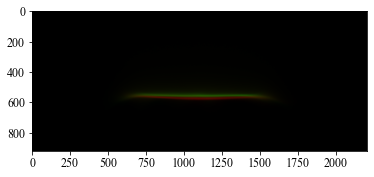

In [29]:
img_roi = get_img_roi(img, 0)

# check range
plt.imshow(img_roi, cmap='gray')
plt.show()

path = img_path.split('.png')[0] + '_trim.png'
plt.imsave(path, img_roi)